# Memodifikasi Pohon Keputusan untuk Fitur Kontinu

## Pendahuluan

Mari kita lihat bagaimana Anda dapat memodifikasi pohon keputusan untuk bekerja dengan fitur yang bukan hanya nilai diskrit, tetapi juga nilai kontinu. Artinya, fitur yang dapat berupa angka apa pun. 

## Contoh Set Data

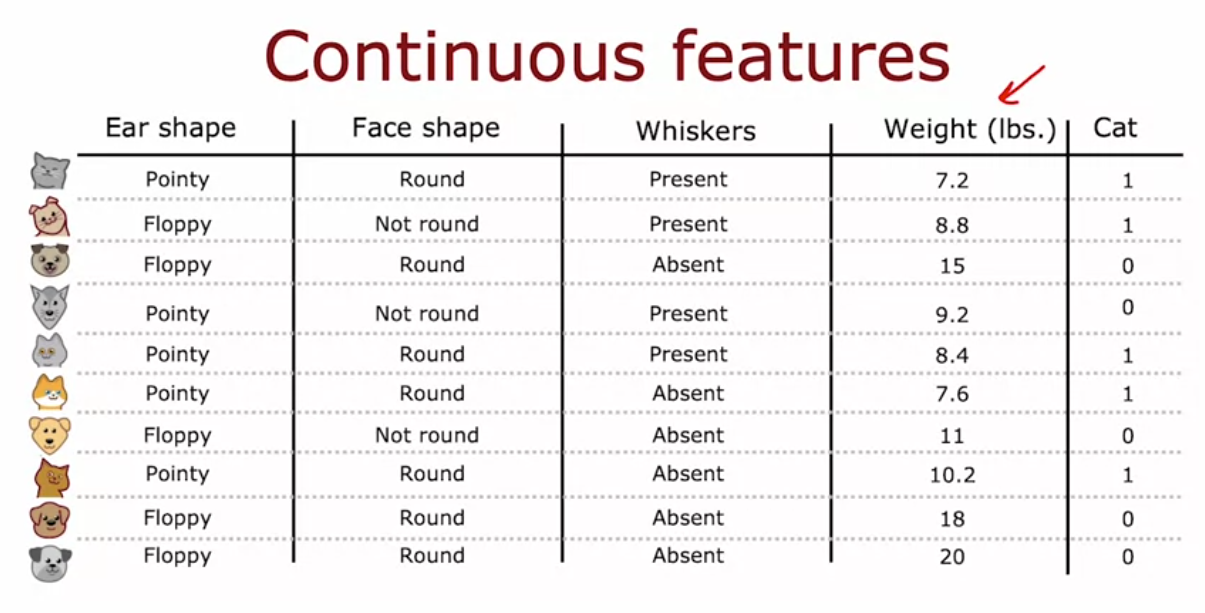

Saya telah memodifikasi set data pusat adopsi kucing untuk menambahkan satu fitur lagi, yaitu berat hewan. Secara rata-rata, antara kucing dan anjing, kucing sedikit lebih ringan dibandingkan anjing, meskipun ada beberapa kucing yang lebih berat dari beberapa anjing. Dengan demikian, berat hewan adalah fitur yang berguna untuk memutuskan apakah itu kucing atau bukan. 

## Penggunaan Fitur Berat

Bagaimana cara agar pohon keputusan menggunakan fitur seperti ini? Algoritma pembelajaran pohon keputusan akan berjalan mirip seperti sebelumnya, kecuali bahwa pembagian tidak hanya terbatas pada bentuk telinga, bentuk wajah, dan kumis. Anda harus mempertimbangkan pembagian pada bentuk telinga, bentuk wajah, kumis, atau berat. Jika pembagian pada fitur berat memberikan informasi yang lebih baik dibandingkan opsi lainnya, maka Anda akan membagi berdasarkan fitur berat tersebut.

### Memilih Threshold untuk Pembagian

Tetapi, bagaimana Anda memutuskan bagaimana cara membagi berdasarkan fitur berat? Mari kita lihat. Berikut adalah plot data di akar. Pada sumbu horizontal adalah berat hewan, dan pada sumbu vertikal ada kategori kucing di atas dan bukan kucing di bawah. Jadi, sumbu vertikal menunjukkan label, di mana y bernilai 1 atau 0. 

Berat akan dibagi berdasarkan apakah beratnya kurang dari atau sama dengan beberapa nilai. Misalkan 8 atau angka lainnya. Ini akan menjadi tugas algoritma pembelajaran untuk memilih nilai tersebut. 

Saat mempertimbangkan pembagian pada fitur berat, kita harus memperhatikan berbagai nilai ambang dan kemudian memilih yang terbaik. Yang saya maksud dengan "terbaik" adalah nilai yang menghasilkan peningkatan informasi terbaik. 

### Contoh Perhitungan Informasi

Jika Anda mempertimbangkan pembagian contoh berdasarkan apakah berat kurang dari atau sama dengan 8, maka Anda akan membagi set data ini menjadi dua subset. Di mana subset di sebelah kiri memiliki dua kucing dan subset di sebelah kanan memiliki tiga kucing dan lima anjing. Jika Anda menghitung peningkatan informasi biasa, Anda akan menghitung entropi di node akar.

$$
\text{Entropy} = N \cdot C \cdot p_f(0.5) - \left(\frac{2}{10} \cdot \text{Entropy(left)}\right) + \left(\frac{8}{10} \cdot \text{Entropy(right)}\right)
$$

Dengan 2 dari 2 kucing di subset kiri dan 3 dari 8 contoh di subset kanan.

Jika Anda menghitungnya, entropi ini menjadi 0.24. Ini adalah peningkatan informasi jika Anda membagi berdasarkan apakah berat kurang dari atau sama dengan 8. Namun, kita juga harus mencoba nilai lainnya.

### Uji Nilai Ambang Lain

Bagaimana jika Anda membagi berdasarkan apakah berat kurang dari atau sama dengan 9? Ini akan sesuai dengan garis baru yang ditambahkan. Perhitungan peningkatan informasi menjadi:

$$
H(0.5) - \left(\frac{4}{10} \cdot \text{Entropy(4/4)}\right) + \left(\frac{6}{10} \cdot \text{Entropy(1/6)}\right)
$$

Di mana kita memiliki 4 contoh di subset kiri (semua kucing) dan 1 kucing di subset kanan dari 6 contoh.

Hasil perhitungan ini adalah 0.61, yang jauh lebih baik dibandingkan 0.24 sebelumnya. 

Kita bisa mencoba nilai lainnya, misalnya 13, dan perhitungan menjadi 0.40. 

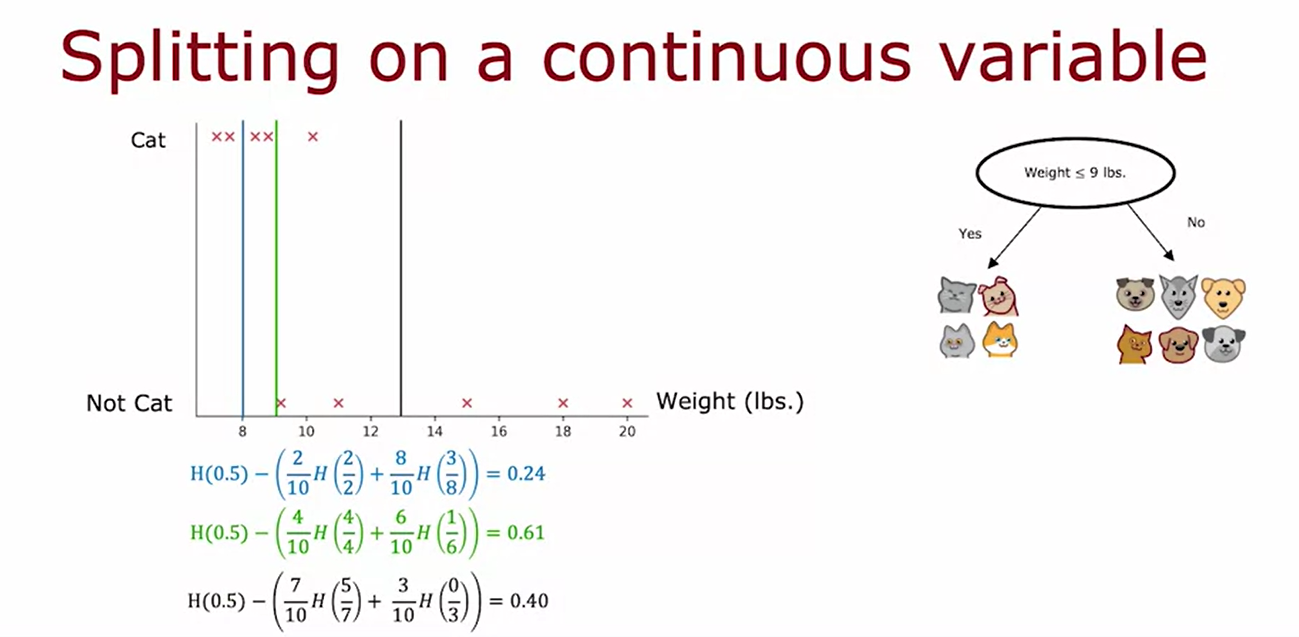


### Pengujian Beberapa Nilai

Dalam kasus yang lebih umum, kita tidak hanya akan mencoba tiga nilai, tetapi juga banyak nilai di sepanjang sumbu X. Salah satu konvensi adalah mengurutkan semua contoh sesuai dengan berat atau nilai dari fitur ini dan mengambil semua nilai yang menjadi titik tengah antara daftar contoh pelatihan yang terurut sebagai nilai untuk dipertimbangkan untuk ambang batas ini.

Dengan cara ini, jika Anda memiliki 10 contoh pelatihan, Anda akan menguji sembilan nilai kemungkinan berbeda untuk ambang batas ini dan kemudian mencoba memilih yang memberikan peningkatan informasi tertinggi.

## Kesimpulan Pembagian

Akhirnya, jika peningkatan informasi dari pembagian pada nilai tertentu dari ambang batas lebih baik daripada peningkatan informasi dari pembagian pada fitur lainnya, maka Anda akan memutuskan untuk membagi node pada fitur tersebut. Dalam contoh ini, peningkatan informasi sebesar 0.61 lebih tinggi dibandingkan fitur lainnya. 

Asumsikan algoritma memilih fitur ini untuk dibagi, maka Anda akan membagi set data berdasarkan apakah berat hewan kurang dari atau sama dengan £9. Anda akan mendapatkan dua subset data dan kemudian dapat membangun pohon keputusan tambahan menggunakan dua subset data ini untuk membangun sisa pohon.

## Ringkasan

Untuk membuat pohon keputusan bekerja pada fitur nilai kontinu, pada setiap node, saat mempertimbangkan pembagian, Anda hanya perlu mempertimbangkan nilai yang berbeda untuk dibagi, melakukan perhitungan peningkatan informasi yang biasa, dan memutuskan untuk membagi pada fitur nilai kontinu jika itu memberikan peningkatan informasi tertinggi. 

Itulah cara Anda membuat pohon keputusan bekerja dengan fitur nilai kontinu. Cobalah berbagai ambang batas, lakukan perhitungan peningkatan informasi yang biasa, dan bagi pada fitur nilai kontinu dengan ambang batas yang dipilih jika memberikan peningkatan informasi terbaik dari semua fitur yang mungkin untuk dibagi.

## Video Opsional

Setelah ini, ada video opsional yang dapat Anda tonton atau tidak yang menggeneralisasi algoritma pembelajaran pohon keputusan menjadi pohon regresi. 

Sejauh ini, kita hanya berbicara tentang menggunakan pohon keputusan untuk membuat prediksi yang merupakan klasifikasi, memprediksi kategori diskrit, seperti kucing atau bukan kucing. Namun, bagaimana jika Anda memiliki masalah regresi di mana Anda ingin memprediksi angka? Dalam video berikutnya, saya akan membahas generalisasi pohon keputusan untuk menangani hal itu.
